In [87]:
from mylib.utils.misc import plot_voxel_enhance
from mylib.dataloader import dataset
import train 
%matplotlib inline

In [71]:
clf_seg_dataset = dataset.ClfSegDataset(crop_size=32, subset=[0,3,4])

In [72]:
len(clf_seg_dataset)

12

In [73]:
x, (y, seg) = clf_seg_dataset[3]

In [74]:
print(x.shape)
print(y)
print(seg.shape)

(32, 32, 32, 1)
[True, False, False]
(32, 32, 32, 1)


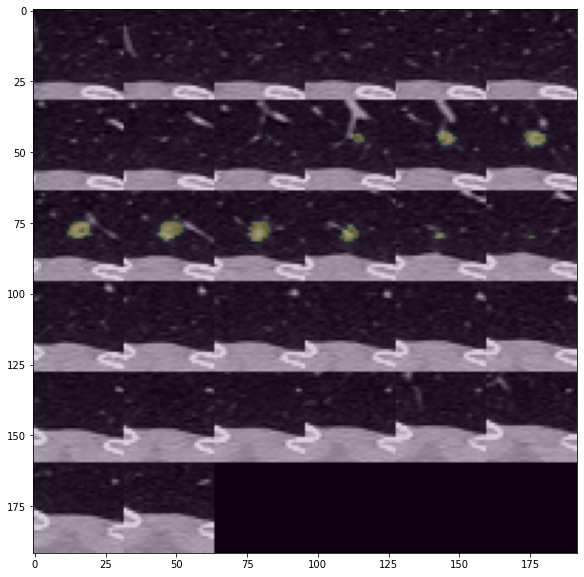

In [75]:
plot_voxel_enhance(x.squeeze(), seg.squeeze(), alpha=0.2)

# The interactive 3D nodule mesh plot

In [76]:
# from IPython.display import HTML
# from mylib.utils.plot3d import plotly_3d_scan_to_html

In [77]:
# plotly_3d_scan_to_html(seg.squeeze(),"tmp.html",step_size=3, zyx_range=((0,32),)*3)
# HTML("tmp.html")

# Create the models * 3D DenseSharp* and * 3D DenseNet*

In [78]:
import tensorflow as tf
import keras
print("TensorFlow version",tf.__version__)
print("Keras version",keras.__version__)

TensorFlow version 2.0.0
Keras version 2.3.1


In [79]:
from mylib.models.misc import set_gpu_usage
set_gpu_usage()

In [80]:
from mylib.models import densenet, densesharp

In [81]:
densenet_model = densenet.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000016ACCC9E558>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000016AD3440438>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3}
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 32, 32, 32, 1 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv3d_82 (Conv3D)              (None, 32, 

In [82]:
densesharp_model = densesharp.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000016AD3426C18>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000016AD343E5E8>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 32, 32, 32, 1 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv3d_109 (Conv3D)  

In [83]:
densesharp_model = densesharp.get_compiled(k=32)

Model hyper-parameters: {'activation': <function <lambda> at 0x0000016AD3426C18>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000016AD343E5E8>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 32, 32, 32, 1 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv3d_136 (Conv3D)  

In [84]:
densenet_model = densenet.get_model()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000016ACCC9E558>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000016AD3440438>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3}
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 32, 32, 32, 1 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv3d_163 (Conv3D)             (None, 32, 

In [85]:
BATCH_SIZE=10
CROP_SIZE=32
MOVE=3
Learn_Rate=0.005
SegLoss=1;


TypeError: main() missing 8 required positional arguments: 'batch_sizes', 'crop_size', 'random_move', 'learning_rate', 'segmentation_task_ratio', 'weight_decay', 'save_folder', and 'epochs'

In [ ]:
  train.main(batch_sizes=[3, 5, 8, 8],
         crop_size=[32, 32, 32],
         random_move=3,
         learning_rate=1.e-4,
         segmentation_task_ratio=0.2,
         weight_decay=0.,
         save_folder='test',
         epochs=100)

Model hyper-parameters: {'activation': <function <lambda> at 0x0000016AD3426C18>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000016AD343E5E8>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_9 (Lambda)               (None, 32, 32, 32, 1 0           input_9[0][0]                    
__________________________________________________________________________________________________
conv3d_217 (Conv3D)  

F:\anaconda3\envs\kr\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
